# AoU FHIR & OMOP Analysis
Information about Sync for Science and OMOP patients, and comparing the data of each.

First, define the locations of the data we wish to analyze and compare, and import the necessary modules.

In [1]:
import os
import json
import pandas as pd
import omop_analyze
import fhir_analyze
import aou_analysis

current_directory = os.getcwd()
omop_directory = "\\omop\\20190823"
fhir_directory = "\\fhir\\Participant"

## 1: FHIR Summary
pull in fhir data, let's find some basic data on the number of patients and number of entries retrived

In [2]:
fhir_patients = fhir_analyze.traverse_directory(current_directory+fhir_directory)

got 83 s4s participants


### 1 a: Histogram showing counts for each data category, across the population

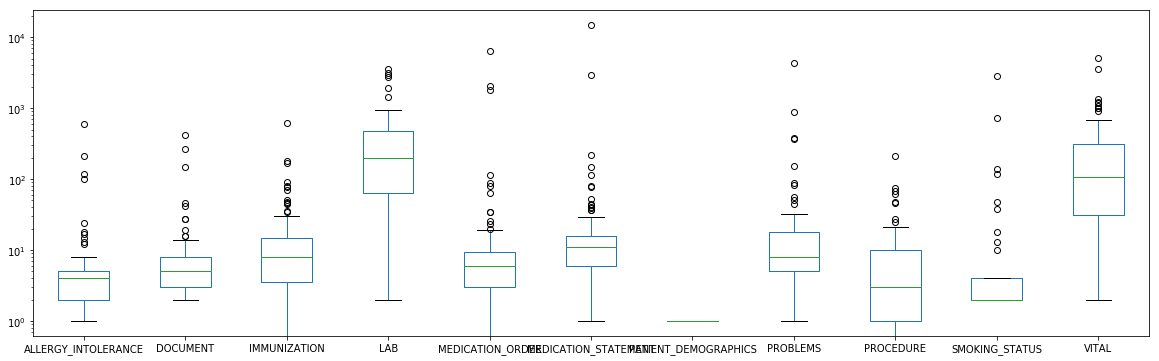

In [18]:
fhir_category_counts_df = aou_analysis.fhir_plot_category_counts(fhir_patients)
fhir_category_counts_df.plot(kind='box', figsize=(20,6), logy=True)

### 1 b: raw counts of histogram buckets

In [4]:
aou_analysis.export_df(fhir_category_counts_df, 'export/fhir_category_counts.csv')

### 1 c: Most common code systems for each data category

In [5]:
aou_analysis.configure_tables()
fhir_systems = aou_analysis.code_system_counts(fhir_patients)
for category, counter in fhir_systems.items():
    df = pd.DataFrame(counter.most_common())
    df.index.name = category
    display(df)
    aou_analysis.export_df(df, 'export/fhir_systems_'+category+'.csv')

""
PATIENT_DEMOGRAPHICS


,0,1
SMOKING_STATUS,,
0,http://loinc.org,591
1,http://snomed.info/sct,427


,0,1
PROBLEMS,,
0,http://snomed.info/sct,3875
1,http://hl7.org/fhir/sid/icd-9-cm,1537
2,urn:oid:2.16.840.1.113883.6.90,1154
3,http://hl7.org/fhir/sid/icd-9-cm/diagnosis,990
4,http://hl7.org/fhir/sid/icd-10-cm,810


,0,1
MEDICATION_ORDER,,
0,http://www.nlm.nih.gov/research/umls/rxnorm,5031
1,None,36
2,http://hl7.org/fhir/sid/ndc,5


,0,1
MEDICATION_STATEMENT,,
0,http://www.nlm.nih.gov/research/umls/rxnorm,7737
1,https://apis.followmyhealth.com/fhir/id/translation,23


,0,1
ALLERGY_INTOLERANCE,,
0,http://www.nlm.nih.gov/research/umls/rxnorm,431
1,http://fdasis.nlm.nih.gov,202
2,http://hl7.org/fhir/ndfrt,162
3,http://snomed.info/sct,134
4,http://hl7.org/fhir/sid/ndc,25
5,None,25


,0,1
LAB,,
0,http://loinc.org,26149


,0,1
VITAL,,
0,http://loinc.org,57167
1,http://snomed.info/sct,1597


,0,1
PROCEDURE,,
0,http://www.ama-assn.org/go/cpt,268
1,urn:oid:1.2.840.114350.1.13.202.2.7.2.696580,122
2,http://snomed.info/sct,119
3,urn:oid:1.2.840.114350.1.13.362.2.7.2.696580,36
4,urn:oid:1.2.840.114350.1.13.324.2.7.2.696580,28
5,urn:oid:2.16.840.1.113883.6.14,17
6,urn:oid:1.2.840.114350.1.13.71.2.7.2.696580,8
7,None,6


,0,1
IMMUNIZATION,,
0,http://hl7.org/fhir/sid/cvx,1773
1,http://hl7.org/fhir/sid/ndc,272
2,http://www.ama-assn.org/go/cpt,110


,0,1
DOCUMENT,,
0,http://loinc.org,531


### 1 d: Most common standardized codes for each data category

In [6]:
fhir_codings = aou_analysis.coding_counts(fhir_patients)
for category, table in fhir_codings.items():
    df = pd.DataFrame(table)
    df.index.name = category
    display(df)
    aou_analysis.export_df(df, 'export/fhir_codings_'+category+'.csv')

""
PATIENT_DEMOGRAPHICS


,code,count,display,system
SMOKING_STATUS,,,,
0,88031-0,237,None,http://loinc.org
1,72166-2,234,Tobacco smoking status NHIS,http://loinc.org
2,714151003,161,Environmental tobacco smoke exposure (observable entity),http://snomed.info/sct
3,8663-7,109,None,http://loinc.org
4,363905002,54,Details of alcohol drinking behavior (observable entity),http://snomed.info/sct
5,224130005,24,Household composition (observable entity),http://snomed.info/sct
6,48766-0,20,None,http://loinc.org
7,266918002,17,Tobacco smoking consumption (observable entity),http://snomed.info/sct
8,73985-4,11,None,http://loinc.org


,code,count,display,system
PROBLEMS,,,,
0,73211009,252,None,http://snomed.info/sct
1,305058001,188,None,http://snomed.info/sct
2,77386006,122,Patient currently pregnant (finding),http://snomed.info/sct
3,29857009,106,None,http://snomed.info/sct
4,55822004,90,Hyperlipidemia (disorder),http://snomed.info/sct
5,195967001,77,None,http://snomed.info/sct
6,300.00,77,"Anxiety state, unspecified",http://hl7.org/fhir/sid/icd-9-cm
7,228315001,72,Binge drinker (finding),http://snomed.info/sct
8,25064002,66,None,http://snomed.info/sct


,code,count,display,system
MEDICATION_ORDER,,,,
0,308416,680,Aspir 81 oral delayed release tablet,http://www.nlm.nih.gov/research/umls/rxnorm
1,243670,195,aspirin 81 mg oral tablet,http://www.nlm.nih.gov/research/umls/rxnorm
2,3498,140,Diphenhydramine,http://www.nlm.nih.gov/research/umls/rxnorm
3,161,135,None,http://www.nlm.nih.gov/research/umls/rxnorm
4,8640,135,None,http://www.nlm.nih.gov/research/umls/rxnorm
5,23950,130,EMLA,http://www.nlm.nih.gov/research/umls/rxnorm
6,5224,120,heparin,http://www.nlm.nih.gov/research/umls/rxnorm
7,259966,105,methylPREDNISolone 4 mg oral tablet,http://www.nlm.nih.gov/research/umls/rxnorm
8,318272,85,"aspirin 81 mg oral tablet, chewable",http://www.nlm.nih.gov/research/umls/rxnorm


,code,count,display,system
MEDICATION_STATEMENT,,,,
0,3498,336,Diphenhydramine,http://www.nlm.nih.gov/research/umls/rxnorm
1,8640,325,None,http://www.nlm.nih.gov/research/umls/rxnorm
2,161,324,None,http://www.nlm.nih.gov/research/umls/rxnorm
3,23950,312,EMLA,http://www.nlm.nih.gov/research/umls/rxnorm
4,5224,288,heparin,http://www.nlm.nih.gov/research/umls/rxnorm
5,313782,194,acetaminophen 325 mg tablet,http://www.nlm.nih.gov/research/umls/rxnorm
6,202433,180,Tylenol,http://www.nlm.nih.gov/research/umls/rxnorm
7,203457,168,Benadryl,http://www.nlm.nih.gov/research/umls/rxnorm
8,10379,108,Testosterone,http://www.nlm.nih.gov/research/umls/rxnorm


,code,count,display,system
ALLERGY_INTOLERANCE,,,,
0,2670,59,None,http://www.nlm.nih.gov/research/umls/rxnorm
1,716186003,47,No known allergy,http://snomed.info/sct
2,QE1QX6B99R,40,None,http://fdasis.nlm.nih.gov
3,N0000007394,26,LATEX,http://hl7.org/fhir/ndfrt
4,256349002,25,Peanut - dietary (substance),http://snomed.info/sct
5,111088007,25,Latex (substance),http://snomed.info/sct
6,256259004,25,Pollen (substance),http://snomed.info/sct
7,None,25,FLUZONE PEDIATRIC,http://hl7.org/fhir/sid/ndc
8,N0000008034,22,SULFA (SULFONAMIDE ANTIBIOTICS),http://hl7.org/fhir/ndfrt


,code,count,display,system
LAB,,,,
0,2160-0,579,Creatinine [Mass/volume] in Serum or Plasma,http://loinc.org
1,2345-7,553,Glucose [Mass/volume] in Serum or Plasma,http://loinc.org
2,17861-6,542,Calcium [Mass/volume] in Serum or Plasma,http://loinc.org
3,3094-0,537,Urea nitrogen [Mass/volume] in Serum or Plasma,http://loinc.org
4,2823-3,533,Potassium [Moles/volume] in Serum or Plasma,http://loinc.org
5,2075-0,519,Chloride [Moles/volume] in Serum or Plasma,http://loinc.org
6,2028-9,499,"Carbon dioxide, total [Moles/volume] in Serum or Plasma",http://loinc.org
7,6690-2,494,Leukocytes [#/volume] in Blood by Automated count,http://loinc.org
8,789-8,489,Erythrocytes [#/volume] in Blood by Automated count,http://loinc.org


,code,count,display,system
VITAL,,,,
0,8716-3,28222,Vital signs,http://loinc.org
1,39156-5,713,None,http://loinc.org
2,225908003,356,Pain score (observable entity),http://snomed.info/sct
3,86198006,160,Influenza vaccination (procedure),http://snomed.info/sct
4,19928-1,125,None,http://loinc.org
5,8327-9,113,None,http://loinc.org
6,41904-4,100,None,http://loinc.org
7,8478-0,93,None,http://loinc.org
8,3151-8,90,None,http://loinc.org


,code,count,display,system
PROCEDURE,,,,
0,86580,52,PR TB INTRADERMAL TEST,http://www.ama-assn.org/go/cpt
1,10224242,41,GENERAL PROCEDURE,urn:oid:1.2.840.114350.1.13.202.2.7.2.696580
2,90412006,25,"Colonoscope, device (physical object)",http://snomed.info/sct
3,69210,19,PR REMOVE IMPACTED EAR WAX,http://www.ama-assn.org/go/cpt
4,G0121,17,PR COLON CA SCRN NOT HI RSK IND,urn:oid:2.16.840.1.113883.6.14
5,93351,15,"PR ECHO HEART XTHORACIC, STRESS/REST, W CONTIN ECG",http://www.ama-assn.org/go/cpt
6,93010,15,"ELECTROCARDIOGRAM, ROUTINE W/AT LEAST 12 LEADS",http://www.ama-assn.org/go/cpt
7,128454,13,SPIROMETRY - NURSING,urn:oid:1.2.840.114350.1.13.324.2.7.2.696580
8,92133,12,PR COMPUTERIZED OPHTHALMIC IMAGING OPTIC NERVE,http://www.ama-assn.org/go/cpt


,code,count,display,system
IMMUNIZATION,,,,
0,140,172,None,http://hl7.org/fhir/sid/cvx
1,115,136,None,http://hl7.org/fhir/sid/cvx
2,88,126,INFLUENZA,http://hl7.org/fhir/sid/cvx
3,98,104,TUBERCULIN PPD TEST,http://hl7.org/fhir/sid/cvx
4,150,100,None,http://hl7.org/fhir/sid/cvx
5,139,57,Td(adult) unspecified formulation,http://hl7.org/fhir/sid/cvx
6,110,50,None,http://hl7.org/fhir/sid/cvx
7,08,49,None,http://hl7.org/fhir/sid/cvx
8,10,47,POLIO,http://hl7.org/fhir/sid/cvx


,code,count,display,system
DOCUMENT,,,,
0,11506-3,389,Subsequent evaluation note,http://loinc.org
1,34133-9,142,Summarization of Episode Note,http://loinc.org


### 1 e: Count of valid vs invalid codes per data category

### 1 f: Tree of FHIR JSON data structure and counts

In [7]:
rootNodes = {}
for person, documents in fhir_patients.items():
    for document, data in documents.items():
        if document not in rootNodes:
            rootNodes[document] = aou_analysis.Node()    
        for entry in data:
            aou_analysis.traverse(entry, rootNodes[document]) 
export_nodes = {}
for name, node in rootNodes.items():
    export_nodes[name] = node.convert_to_dict()
with open('export/fhir_tree_counts.json', "w") as outfile:
    json.dump(export_nodes, outfile)
rootNodes

{'PATIENT_DEMOGRAPHICS': <dict children: {
    resourceType: <str total: 83 values: 
       Patient: 83>
    birthDate: <str total: 83>
    active: <bool total: 83 values: 
       True: 83>
    gender: <str total: 83>
    deceasedBoolean: <bool total: 73 values: 
       False: 72
       True: 1>
    id: <str total: 83>
    careProvider: <list top values: [('1', 74), ('2', 2)] children: {
       dict: <dict children: {
          display: <str total: 78>
          reference: <str total: 78>
       }>
    }>
    name: <list top values: [('1', 74), ('5', 6), ('4', 2), ('3', 1)] children: {
       dict: <dict children: {
          use: <str total: 105>
          text: <str total: 110>
          family: <list top values: [('1', 115)] children: {
             str: <str total: 115>
          }>
          given: <list top values: [('2', 60), ('1', 55)] children: {
             str: <str total: 175>
          }>
          period: <dict children: {
             start: <str total: 16>
            

# 2: OMOP Summary

number of patients and records retrieved from OMOP CSVs

In [8]:
omop_patients, csvs = omop_analyze.parse_omop(path=current_directory+omop_directory)

found line without patient
Got 74 omop participants


### 2 a:Histogram showing counts for each OMOP data type, across the population. 

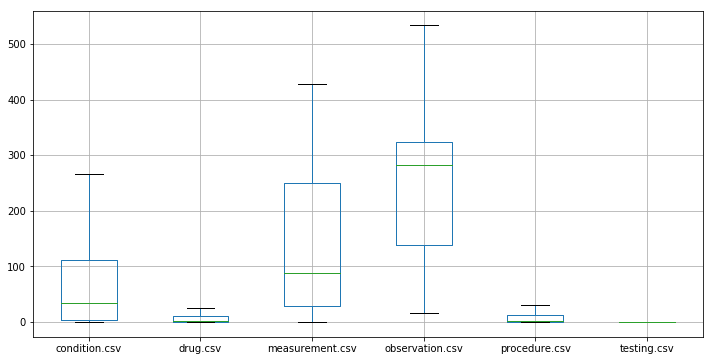

In [9]:
omop_category_counts_df = aou_analysis.omop_plot_category_counts(omop_patients, csvs)
aou_analysis.export_df(omop_category_counts_df, 'export/omop_category_counts.csv')
display(omop_category_counts_df.boxplot(figsize=(12,6), showfliers=False))

### 2 b: Count of standardized code *systems* for each OMOP data type.

In [10]:
system_counts = aou_analysis.omop_system_counts(omop_patients)
omop_system_df = pd.DataFrame(system_counts).transpose()
aou_analysis.export_df(omop_system_df, 'export/omop_system_counts.csv')
display(omop_system_df)

,CPT4,ICD9Proc,LOINC,None,PPI,RxNorm,SNOMED
condition.csv,NaN,NaN,NaN,133.0,NaN,NaN,9365.0
drug.csv,NaN,NaN,NaN,2945.0,NaN,97.0,NaN
measurement.csv,NaN,NaN,12146.0,974.0,427.0,NaN,19.0
observation.csv,NaN,NaN,2855.0,2309.0,12140.0,NaN,1647.0
procedure.csv,569.0,49.0,NaN,59.0,NaN,NaN,443.0


### 2 c: Top N standardized codes for each data category.

In [17]:
coding_counts, vocab = aou_analysis.omop_coding_counts(omop_patients)
vocab_df = aou_analysis.compose_vocab_df(vocab)

for name, counter in coding_counts.items():
    df = pd.DataFrame(counter.most_common())
    df.set_index([0], inplace=True)
    df.rename(columns={1: 'count'}, inplace=True)
    df.index.name = name
    new_df = df.join(vocab_df)
    aou_analysis.export_df(new_df, 'export/omop_'+name.split('.')[0]+'coding_counts.csv')
    display(new_df)

,count,concept_name,source_name
condition.csv,,,
78097 45552285,166,Secondary malignant neoplasm of bone,Secondary malignant neoplasm of bone
320128 35207668,148,Essential hypertension,Essential (primary) hypertension
4163261 35206266,133,Malignant tumor of prostate,Malignant neoplasm of prostate
42872402 45586572,128,Coronary arteriosclerosis in native artery,Atherosclerotic heart disease of native coronary artery without angina pectoris
4157332 45556996,120,Malignant neoplasm of female breast,Malignant neoplasm of unspecified site of left female breast
137809 45556996,120,Primary malignant neoplasm of female breast,Malignant neoplasm of unspecified site of left female breast
137809 44824029,111,Primary malignant neoplasm of female breast,"Malignant neoplasm of breast (female), unspecified"
4157332 45600511,108,Malignant neoplasm of female breast,Malignant neoplasm of unspecified site of unspecified female breast
137809 45600511,108,Primary malignant neoplasm of female breast,Malignant neoplasm of unspecified site of unspecified female breast


,count,concept_name,source_name
drug.csv,,,
0,112,NaN,NaN
19122121,80,NaN,NaN
1308216,61,NaN,NaN
1112807,57,NaN,NaN
797399,51,NaN,NaN
778711,51,NaN,NaN
715259,49,NaN,NaN
1103314,47,NaN,NaN
1539403,47,NaN,NaN


,count,concept_name,source_name
measurement.csv,,,
0 0,974,No matching concept,No matching concept
3004249 5,850,Systolic blood pressure,Observation period type
3012888 5,850,Diastolic blood pressure,Observation period type
3027598 5,850,Mean blood pressure,Observation period type
3024171 9,662,Respiratory rate,Visit type
3013762 14,598,Body weight Measured,Drug type
3036277 11,557,Body height,Procedure type
3020891 6,458,Body temperature,Death type
3022318 1586218,284,Heart rate rhythm,Heart rhythm status


,count,concept_name,source_name
observation.csv,,,
0 0,2133,No matching concept,No matching concept
4041306 0,647,Tobacco use and exposure,No matching concept
4144272 5,377,Never smoked tobacco,Observation period type
1586155 1586155,144,White: White Specific,White: White Specific
1585636 1585636,129,Recreational Drug Use: Which Drugs Used,Recreational Drug Use: Which Drugs Used
44817220 1585252,124,Reporter phone number,PII Contact Information: Phone
3043579 1585250,124,ZIP Code [Location],Street Address: PIIZIP
40766228 1585248,124,Current city [PhenX],Street Address: PII City
3042942 1585596,124,First name,PII Name: First


,count,concept_name,source_name
procedure.csv,,,
2108115 2108115,70,,
4036803 45552054,58,General examination of patient,Encounter for general adult medical examination without abnormal findings
4145333 44826243,47,Adult health examination,Routine general medical examination at a health care facility
4077697 44836711,37,Screening mammography,Other screening mammogram
4132855 35225097,28,Immunization,Encounter for immunization
4147961 45542403,27,Screening for malignant neoplasm of breast,Encounter for screening mammogram for malignant neoplasm of breast
4029715 35225154,27,Radiation oncology AND/OR radiotherapy,Encounter for antineoplastic radiation therapy
4205728 44828568,26,Radiation therapy procedure or service,Encounter for radiotherapy
2213283 2213283,25,,


### 2 e: For each OMOP column, how often was a value present vs absent? 

### 2 f: For each OMOP column representing a status flag, what is the distribution of values? 

# 3: Comparison of OMOP and FHIR data
